In [82]:
import PyDSTool as pdt
import numpy as np
import networkx as nx
from random import shuffle
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from pydivest.macro_model.integrate_equations_aggregate import IntegrateEquationsAggregate as Model

$Y = b K^\alpha L^\beta C^\gamma$

$\dot{K} = s_1 Y - \delta K$

$\dot{K} = s_2 Y - \delta K$

In [93]:
DSargs = pdt.args(name='tryout')
equations = {'K': 's1 * b * K**alpha * C**gamm - delta1*K',
             'C': 'b * K**alpha * C**gamm - delta2*C'}
params = {'s1': 0.05,
          'b': 01.,
          'alpha': 0.5,
          'beta': .5,
          'gamm': .5,
          'delta1': 0.06,
          'delta2': 1.}
initials = {'K': 2.,
            'C': 2.}
DSargs.varspecs = equations
DSargs.pars = params
DSargs.ics = initials
DSargs.tdata = [0, 300]
DSargs.algparams = {'init_step': 0.2}

In [94]:
ode = pdt.Generator.Vode_ODEsystem(DSargs)
traj = ode.compute('some name?')
pts = traj.sample(dt=.1)

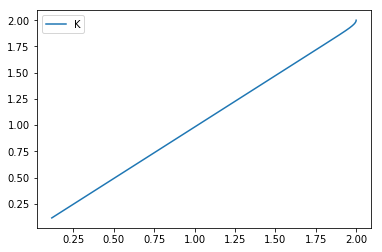

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pts['C'], pts['K'], label='K')
plt.legend()

In [96]:
CC = pdt.ContClass(ode)
CCargs = pdt.args(name='EQ1', type='EP-C')
CCargs.freepars = ['b']

In [97]:
CC.newCurve(CCargs)

In [98]:
CC['EQ1'].forward()

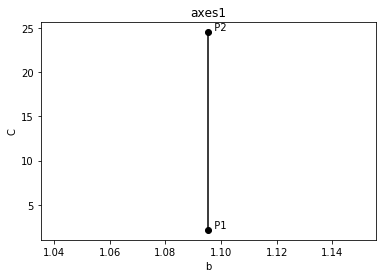

In [99]:
CC['EQ1'].display()